In [76]:

from help import unpickle
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
from inspect import signature


# Import dataframes
M = unpickle('dataframe')
LF = unpickle('linear future')
EF = unpickle('exponential future')

In [30]:
def convert_date_to_number(start_date) -> int:
    '''
Return number of days since January 1, 2000
    '''
    end_date = datetime(2000,1,1)
    difference = start_date - end_date
    return difference.days

def convert_number_to_date(days_since):
    end_date = datetime(2000,1,1)
    return end_date + timedelta(days=days_since)
    

In [31]:
# make future array of dates
future_dates = [datetime(x, 12, 21) for x in range(2022, 2043)]
future_array = np.array([convert_date_to_number(x) for x in future_dates])

In [41]:
# Confirm that there are values in each column

M.count(), LF.count(), EF.count()

(CNY/USD                                                   22372
 RUB/USD                                                   10318
 KRW/USD                                                   22372
 South Korea's Retail Price Electricity Power (USD:kWh)    10029
 Tianjin Precip (mm)                                       10124
 South Korea Imports of Crude Oil (USD THO)                 6522
 China Tianjin Water Price (USD:ton)                        5951
 China Crude Oil Production (BBL:D:1K)                     17351
 China Imports of Crude Petroleum (USD THO)                10292
 China Ethylene Glycol Prices (USD:ton)                     6292
 CPI Price Data US Electricity $:kwh                       15258
 Ammonia Price China (USD:Ton)                              3401
 MEA Price China (USD:mt)                                    334
 US PPI Oxygen (1981=100)                                  14477
 China Ethylene Prices (USD:ton)                            1943
 Australia Gas Production

In [ ]:
'''
def cost_of_mea(X, m1, m2, b):
    # unpack variables
    dates, cost_of_crude = X
    # return function
    return m1*dates + m2*cost_of_crude + b
'''


In [128]:
# define a linearizing function that get

def linearize(function, get, names):
    '''
function is any function

get is the string of the column that you want

names is a list of strings

example:


def cost_of_mea(X, m1, m2, b):
    # unpack variables
    dates, cost_of_crude = X
    # return function
    return m1*dates + m2*cost_of_crude + b

names = ['China Imports of Crude Petroleum (USD THO)','China Tianjin Water Price (USD:ton)']
get = 'MEA Price China (USD:mt)'

constants, covariance = linearize(cost_of_mea,get,names)

# predict future
m1, m2, b = constants
y_pred = cost_of_mea(future_array, m1, m2, b)
    '''

    sig = signature(cost_of_mea)

    X = M[names].to_numpy()
    y = M[[get]].to_numpy().flatten()

    if X.shape[1] > 1:
        # X is a multidimensional array
        bool_array = (np.isnan(X.sum(axis=1)) == False) & (np.isnan(y) == False)

        time_array = np.array([convert_date_to_number(i) for i in M.index[bool_array]])
        X = X[bool_array]
        y = y[bool_array]

        X = tuple([X[:,i] for i in range(X.shape[1])])

        start_constants = [0 for i in range(len(sig.parameters) - 1)]

    else:
        # it's only being compared to one thing
        X = X.flatten()

        bool_array = (np.isnan(X) == False) & (np.isnan(y) ==  False)

        time_array = np.array([convert_date_to_number(i) for i in M.index[bool_array]])
        X = X[bool_array]
        y = y[bool_array]

        start_constants = [0 for i in range(len(sig.parameters) - 1)]

    constants, covariance = scipy.optimize.curve_fit(cost_of_mea, X, y, p0=start_constants)

    return constants, covariance

In [129]:
# Cost of monoethanolamine (MEA)

def cost_of_mea(cost_of_crude, m, b):
    return m*cost_of_crude + b

names = ['China Imports of Crude Petroleum (USD THO)'] #,'China Tianjin Water Price (USD:ton)'
get = 'MEA Price China (USD:mt)'

constants, covariance = linearize(cost_of_mea,get,names)

m, b = constants
y_pred = cost_of_mea(future_array, m, b)

array([13.47492417, 13.55685015, 13.63900059, 13.72092657, 13.80285255,
       13.88477853, 13.96692896, 14.04885494, 14.13078092, 14.2127069 ,
       14.29485733, 14.37678331, 14.45870929, 14.54063527, 14.62278571,
       14.70471169, 14.78663767, 14.86856365, 14.95071408, 15.03264006,
       15.11456604])

In [80]:
len(sig.parameters)

3

In [66]:
np.isnan(new)

array([ True,  True,  True, ...,  True,  True,  True])

In [54]:
a = M[['China Imports of Crude Petroleum (USD THO)']].to_numpy().flatten()

In [57]:
bool_array

array([nan, nan, nan, ..., nan, nan, nan])

In [34]:
# plot and calculate correctness

m, b = constants
y_pred = cost_of_mea(crude_array, m, b)



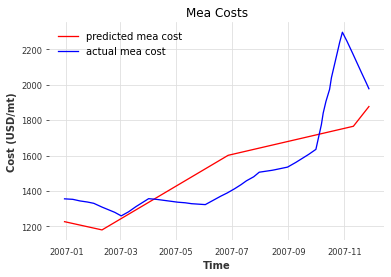

In [35]:
plt.title("Mea Costs")
plt.xlabel("Time")
plt.ylabel("Cost (USD/mt)")

time = time_array
time = [convert_number_to_date(int(x)) for x in time]

plt.plot(time, y_pred, label = "predicted mea cost", color='red')
plt.plot(time, mea_array, label = "actual mea cost", color='blue')
plt.legend()

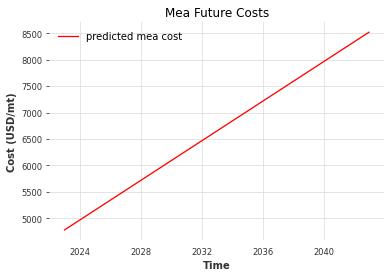

In [37]:
# Analysis of Extrapolation into the Future

future_china_petro = LF[['China Imports of Crude Petroleum (USD THO)']].to_numpy().flatten()

X = future_china_petro

y_pred = cost_of_mea(X, m, b)

plt.title("Mea Future Costs") 
plt.xlabel("Time")
plt.ylabel("Cost (USD/mt)")

plt.plot(future_dates, y_pred, label = "predicted mea cost", color='red')
plt.legend()

In [27]:
a, b, c

(7.558165449251504, -0.000560560552940896, -15316.385046849151)

In [25]:
M[['China Imports of Crude Petroleum (USD THO)','MEA Price China (USD:mt)']].corr()

,China Imports of Crude Petroleum (USD THO),MEA Price China (USD:mt)
China Imports of Crude Petroleum (USD THO),1.000000,0.742184
MEA Price China (USD:mt),0.742184,1.000000


In [26]:
# Cost of Ethylene


# Cost of Ethylene Glycol


# Cost of Oxygen


# Cost of Water


# Cost of Electricity


# Cost of Steam

